Importing Necessary Libraries

In [ ]:
pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

Reading the Clean csv file

In [2]:
data_all = pd.read_csv('cLean_file.csv')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(data_all.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Summary', 'Issue key', 'Issue id',
       'Issue Type', 'Status', 'Project key', 'Project name', 'Project type',
       'Project lead', 'Project lead id', 'Project description', 'Project url',
       'Priority', 'Resolution', 'Assignee', 'Assignee Id', 'Reporter',
       'Reporter Id', 'Creator', 'Creator Id', 'Created', 'Updated',
       'Last Viewed', 'Resolved', 'Due date', 'Description', 'Unnamed: 27',
       'created_Time', 'created_Date', 'last_Time', 'last_Date', 'duration',
       'day_of_week'],
      dtype='object')


In [4]:
print(len(data_all.columns))

35


In [5]:
data_all.head(5)

,Unnamed: 0,Unnamed: 0.1,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,...,Resolved,Due date,Description,Unnamed: 27,created_Time,created_Date,last_Time,last_Date,duration,day_of_week
0,0,1,MyGovernmentOnline.org - New Contact Request,MWS-123772,184523.0,Task,Acknowledged,MWS,MGO Website Support,software,...,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,NaN,19:26:00,2022-10-25,NaN,NaN,NaN,Tuesday
1,1,2,MyGovernmentOnline.org - New Contact Request,MWS-123771,184522.0,Task,Acknowledged,MWS,MGO Website Support,software,...,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,NaN,18:34:00,2022-10-25,NaN,NaN,NaN,Tuesday
2,2,3,MyGovernmentOnline.org - New Contact Request,MWS-123770,184521.0,Task,Acknowledged,MWS,MGO Website Support,software,...,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,NaN,18:14:00,2022-10-25,NaN,NaN,NaN,Tuesday
3,3,4,MyGovernmentOnline.org - New Contact Request,MWS-123769,184520.0,Task,Acknowledged,MWS,MGO Website Support,software,...,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,NaN,17:42:00,2022-10-25,NaN,NaN,NaN,Tuesday
4,4,5,MyGovernmentOnline.org - New Contact Request,MWS-123768,184518.0,Task,Acknowledged,MWS,MGO Website Support,software,...,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,NaN,16:58:00,2022-10-25,NaN,NaN,NaN,Tuesday


Removing all the Unnecessary Columns

In [6]:
data_all.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 27','Summary','Issue Type','Project key', 'Project name', 'Project type',
       'Project lead', 'Project lead id','Assignee', 'Assignee Id', 'Reporter',
       'Reporter Id', 'Creator', 'Creator Id','Project url', 'Priority'] , axis = 1, inplace = True)

In [7]:
print(data_all.columns)

Index(['Issue key', 'Issue id', 'Status', 'Project description', 'Resolution',
       'Created', 'Updated', 'Last Viewed', 'Resolved', 'Due date',
       'Description', 'created_Time', 'created_Date', 'last_Time', 'last_Date',
       'duration', 'day_of_week'],
      dtype='object')


In [8]:
data_all.head(5)

,Issue key,Issue id,Status,Project description,Resolution,Created,Updated,Last Viewed,Resolved,Due date,Description,created_Time,created_Date,last_Time,last_Date,duration,day_of_week
0,MWS-123772,184523.0,Acknowledged,receives all form mail from the mygovernmenton...,NaN,2022-10-25 19:26:00,10/25/22 19:26,2022-10-25 20:14:00,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,19:26:00,2022-10-25,NaN,NaN,NaN,Tuesday
1,MWS-123771,184522.0,Acknowledged,receives all form mail from the mygovernmenton...,NaN,2022-10-25 18:34:00,10/25/22 18:34,2022-10-25 20:14:00,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,18:34:00,2022-10-25,NaN,NaN,NaN,Tuesday
2,MWS-123770,184521.0,Acknowledged,receives all form mail from the mygovernmenton...,NaN,2022-10-25 18:14:00,10/25/22 18:14,2022-10-25 20:14:00,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,18:14:00,2022-10-25,NaN,NaN,NaN,Tuesday
3,MWS-123769,184520.0,Acknowledged,receives all form mail from the mygovernmenton...,NaN,2022-10-25 17:42:00,10/25/22 17:42,2022-10-25 20:14:00,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,17:42:00,2022-10-25,NaN,NaN,NaN,Tuesday
4,MWS-123768,184518.0,Acknowledged,receives all form mail from the mygovernmenton...,NaN,2022-10-25 16:58:00,10/25/22 16:58,2022-10-25 20:14:00,NaN,NaN,MyGovernmentOnline.org\n\nNew Contact Request\...,16:58:00,2022-10-25,NaN,NaN,NaN,Tuesday


Description Column Cleaning

In [ ]:
#Converting all words to lowercase
#r'\n': to remove "line seperators", r'\r': to remove "tabs"
data_all['lower_description'] = data_all['Description'].str.lower().replace(r'\n',' ', regex=True).replace(r'\r',' ', regex=True)
print(data_all['lower_description'].head(10))

In [10]:
print(data_all['lower_description'][700])

mygovernmentonline.org  new contact request  time sent: 10/13/2022 11:11:57 am  name: cindy p crumholt  e-mail: cindy@jreedconstructors.com  phone: 2252018826  subject: new email address  message:  i have a new email address. how do i change it to cindy@jreedconstructors.net? thank you, cindy [created via e-mail received from: no-reply@mygovernmentonline.org]


In [11]:
#declaring an empty column
data_all['names'] = ""

In [ ]:
#Getting the names of all the customers
names = []
for col in data_all['lower_description']:
    text = str(col)
    if 'name:' in text:
        left = 'name: '
    elif 'name:' not in text:
        name = 'NaN'
        continue
    if '  e-mail:' in text:       
        right = '  e-mail:'
    elif '  e-mail:' not in text:
        continue
    name = text[text.index(left)+len(left):text.index(right)]     
    names.append(name)
print(names)

In [13]:
print(len(names))

36676


In [14]:
#Removing Https: links
data_all['lower_clean_description'] = data_all['lower_description'].str.replace('http\S+|www.\S+', '', case=False)

/tmp/ipykernel_59/3023709651.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['lower_clean_description'] = data_all['lower_description'].str.replace('http\S+|www.\S+', '', case=False)


In [15]:
print(data_all.lower_clean_description[19])

      from: orlando rodriguez <orodriguez@pbstownhall.org> sent: thursday, october 13, 2022 2:40 pm to: mygovernmentonline support <support@mygovernmentonline.org> subject: mgo connect live national 2022     good afternoon,     if still available, i would like to attend the conference.     my name is orlando rodriguez.       thank you,      orlando rodriguez     code enforcement officer  building department clerk  crs coordinator   grants coordinator  floodplain coordinator     town of palm beach shores  247 edwards lane  palm beach shores, fl 33404  phone:  561-844-3457     cell:  772-302-6485     [1] ---------------------------------------------------------------------------------------- [1]  [created via e-mail received from: mygovernmentonline support <support@mygovernmentonline.org>]


In [16]:
#Removing all special characters
data_all['lower_clean_char_description'] = data_all['lower_clean_description'].str.replace('(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])'," ")

/tmp/ipykernel_59/1450204126.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['lower_clean_char_description'] = data_all['lower_clean_description'].str.replace('(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])'," ")


In [17]:
print(data_all.lower_clean_char_description.head(10))

0    mygovernmentonline org  new contact request  t...
1    mygovernmentonline org  new contact request  t...
2    mygovernmentonline org  new contact request  t...
3    mygovernmentonline org  new contact request  t...
4    mygovernmentonline org  new contact request  t...
5    hi todd     please remove the existing permit ...
6    mygovernmentonline org  new contact request  t...
7    mygovernmentonline org  new contact request  t...
8    please review the following report and ensure ...
9    good afternoon     can we remove ossf from any...
Name: lower_clean_char_description, dtype: object


In [18]:
#Checking if there's anything else to clean
data_all.lower_clean_char_description[5]

'hi todd     please remove the existing permit templates and replace with these new templates we have a new county engineer  if you need anything else please let me know     thank you       odalis garcia  engineering  administrative assistant   bastrop county  211 jackson st   bastrop  tx 78602  512 581 4077   odalis garcia co bastrop tx us        cid image001 jpg 01d8e88f 097a5890                confidentiality notice       this e mail communication may contain confidential information belonging to the sender that is legally privileged   this information is intended only for the use of the individual or entity named above   the authorized recipient of this information is prohibited from disclosing this information to any other party and is required to destroy the information after its stated need has been fulfilled  unless otherwise required by state law     if you are not the intended recipient  you are hereby notified that any disclosure  copying  distribution  or action taken in re

In [19]:
print(len(data_all.lower_clean_char_description))

93967


In [20]:
#Converting the col into a string type
data_all['lower_clean_char_description'] = data_all['lower_clean_char_description'].astype(str)
print(data_all.lower_clean_char_description.head(20))

0     mygovernmentonline org  new contact request  t...
1     mygovernmentonline org  new contact request  t...
2     mygovernmentonline org  new contact request  t...
3     mygovernmentonline org  new contact request  t...
4     mygovernmentonline org  new contact request  t...
5     hi todd     please remove the existing permit ...
6     mygovernmentonline org  new contact request  t...
7     mygovernmentonline org  new contact request  t...
8     please review the following report and ensure ...
9     good afternoon     can we remove ossf from any...
10    mygovernmentonline org  new contact request  t...
11    the following permit types should not be displ...
12    for building projects there is a tab that show...
13    brad baker is in our admin department  he need...
14    mygovernmentonline org  new contact request  t...
15    when a 15 day letter is generated  the inspect...
16    mygovernmentonline org  new contact request  t...
17    good afternoon     please remove the user 

In [21]:
#Removing everything before the word "message" in all the tickets
num = 0
for i in range(93967):
    index = data_all.lower_clean_char_description[num].find('message') #stores the index of a substring or char
    new_d = data_all.lower_clean_char_description[num][index:] #returns the chars after the seen char or substring
    data_all.at[num,'lower_clean_char_description'] = new_d
    num += 1

In [22]:
print(len(data_all.lower_clean_char_description))

93967


In [23]:
print(data_all.lower_clean_char_description.head(10))

0    message   i live in austin tx based on my addr...
1    message   i already have an account  how do i ...
2    message   please let us know where we send the...
3    message   i have a noc that is not appearing a...
4    message   i have fixed the problem swepco said...
5                                                     
6    message   hello  i would like to know how to g...
7    message   hello  this is tanzil from green lea...
8                                                     
9                                                     
Name: lower_clean_char_description, dtype: object


In [24]:
num = 0
for i in range(len(data_all.lower_clean_char_description)):
    index = data_all.lower_clean_char_description[num].find('created') #stores the index of a substring or char
    new_d = data_all.lower_clean_char_description[num][:index] #returns the chars before the seen char or substring
    data_all.at[num,'lower_clean_char_description'] = new_d
    num += 1
   

In [25]:
print(data_all.lower_clean_char_description.head(20))

0     message   i live in austin tx based on my addr...
1     message   i already have an account  how do i ...
2     message   please let us know where we send the...
3     message   i have a noc that is not appearing a...
4     message   i have fixed the problem swepco said...
5                                                      
6     message   hello  i would like to know how to g...
7     message   hello  this is tanzil from green lea...
8                                                      
9                                                      
10    message   lago vista is a bit cryptic in their...
11                                                     
12                                                     
13                                                     
14    message   at the palace theater we are adding ...
15                                                     
16                message   for chambers county texas  
17                                              

In [26]:
#Removing the word "message"
data_all['clean_des_col'] = data_all['lower_clean_char_description'].str.replace('message', '')
print(data_all.clean_des_col.sample(100))

65650       i am currently working on two restaurants t...
46828     and delete the original and all copies of the...
92594       i made the application  got feedback  made ...
84454       i need assistance on how to apply for a per...
74402       do i need a permit for replacing a new two ...
                               ...                        
76149       how do i get my permits to show up on myper...
47850                                                     
76882       hi   i see on the  requirements  page that ...
5993        once we got our permit our clients decided ...
28973       good afternoon  i have requested to extend ...
Name: clean_des_col, Length: 100, dtype: object


In [27]:
print(data_all.clean_des_col[20104])

   new 09 08 2021 pensacola 21 453 robert smith  glenn  21 08 7282 4510 la jolla pensacola fl 32504 roof final inspection not assigned  111  222 3333 i need the above request deleted from my account  the inspector failed the inspection without even looking at the job  so  i resheduled it with a note to him  but he passed and closed the original request  now i cannot cancel this request in the system because he closed the permit out   


In [28]:
import numpy as np

In [29]:
#Replacing all the empty rows with "NaN"
data_all['clean_des_col_2'] = data_all['clean_des_col'].replace('', np.nan, regex=True)

In [30]:
print(data_all.clean_des_col_2.head(30))

0        i live in austin tx based on my address but...
1        i already have an account  how do i registe...
2        please let us know where we send the docume...
3        i have a noc that is not appearing and i wa...
4        i have fixed the problem swepco said i had ...
5                                                   NaN
6        hello  i would like to know how to go about...
7        hello  this is tanzil from green leaf air  ...
8                                                   NaN
9                                                   NaN
10       lago vista is a bit cryptic in their in str...
11                                                  NaN
12                                                  NaN
13                                                  NaN
14       at the palace theater we are adding another...
15                                                  NaN
16                          for chambers county texas  
17                                              

In [31]:
print(data_all['clean_des_col_2'][5])

nan


In [32]:
print(len(data_all['clean_des_col_2']))

93967


In [33]:
data_all['clean_des_col_2'].isnull().sum()

52216

In [34]:
df = data_all['clean_des_col_2']

In [ ]:
df.to_csv('MGOclean.csv')

In [35]:
print(df.head(10))

0       i live in austin tx based on my address but...
1       i already have an account  how do i registe...
2       please let us know where we send the docume...
3       i have a noc that is not appearing and i wa...
4       i have fixed the problem swepco said i had ...
5                                                  NaN
6       hello  i would like to know how to go about...
7       hello  this is tanzil from green leaf air  ...
8                                                  NaN
9                                                  NaN
Name: clean_des_col_2, dtype: object


In [36]:
print(df[40339])

   just 


In [37]:
#Dropping all the null values
df2 = df.dropna()

In [38]:
print(df2.head(15))

0        i live in austin tx based on my address but...
1        i already have an account  how do i registe...
2        please let us know where we send the docume...
3        i have a noc that is not appearing and i wa...
4        i have fixed the problem swepco said i had ...
6        hello  i would like to know how to go about...
7        hello  this is tanzil from green leaf air  ...
10       lago vista is a bit cryptic in their in str...
14       at the palace theater we are adding another...
16                          for chambers county texas  
21       hello we have a filled application for the ...
22       hi my name is joy worthy  i m with kacy reg...
26       can someone please contact me at 301 252 91...
30       just got an email saying my permit was retu...
34       hello  i have found the application to regi...
Name: clean_des_col_2, dtype: object


In [39]:
print(df2.isnull().sum())
print(len(df2))

0
41751


In [42]:
reviews = " ".join(df2)

In [43]:
print(len(reviews))

12462559


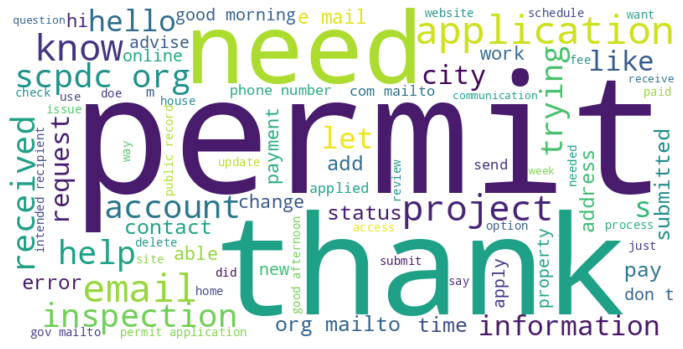

In [44]:
# Create the word cloud image
word_cloud = WordCloud(background_color="white",
                       stopwords=ENGLISH_STOP_WORDS,
                       width=800,
                       height=400,
                       max_words = 80
                      )

# Generate the word cloud using the review data
word_cloud.generate(reviews)

# Display the word cloud
plt.rcParams["figure.figsize"] = (12, 8)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
freq = word_cloud.process_text(reviews)
print(freq["permit"])
print(freq["need"])
print(freq["thank"])
print(freq["application"])
print(freq["email"])

15934
10720
10749
5809
5602


In [ ]:
sorted(freq, key=freq.get, reverse=True)

In [47]:
print(df2)

0           i live in austin tx based on my address but...
1           i already have an account  how do i registe...
2           please let us know where we send the docume...
3           i have a noc that is not appearing and i wa...
4           i have fixed the problem swepco said i had ...
                               ...                        
93961       i need to have access to add a job and also...
93962       the frame  rough electrical  rough mechanic...
93963                                               test  
93964         i tried to apply for a permit online for ...
93965                                               test  
Name: clean_des_col_2, Length: 41751, dtype: object


In [48]:
data_all.head(20)
data_all.columns

Index(['Issue key', 'Issue id', 'Status', 'Project description', 'Resolution',
       'Created', 'Updated', 'Last Viewed', 'Resolved', 'Due date',
       'Description', 'created_Time', 'created_Date', 'last_Time', 'last_Date',
       'duration', 'day_of_week', 'lower_description', 'names',
       'lower_clean_description', 'lower_clean_char_description',
       'clean_des_col', 'clean_des_col_2'],
      dtype='object')

In [53]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93967 entries, 0 to 93966
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Issue key                     93945 non-null  object 
 1   Issue id                      93945 non-null  float64
 2   Status                        93945 non-null  object 
 3   Project description           93945 non-null  object 
 4   Resolution                    93337 non-null  object 
 5   Created                       93945 non-null  object 
 6   Updated                       93945 non-null  object 
 7   Last Viewed                   93945 non-null  object 
 8   Resolved                      93337 non-null  object 
 9   Due date                      0 non-null      float64
 10  Description                   93802 non-null  object 
 11  created_Time                  93945 non-null  object 
 12  created_Date                  93945 non-null  object 
 13  l

In [54]:
data_all.to_csv("cleandes.csv")